In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from ipywidgets import interactive,fixed
from IPython.display import display

In [4]:
# Definir las derivadas del sistema
def derivadas_1(X, t):
    x, y = X
    dotx = -x + 4*y
    doty = -x - y**3
    return np.array([dotx, doty])

t = np.linspace(0, 20, 1000)

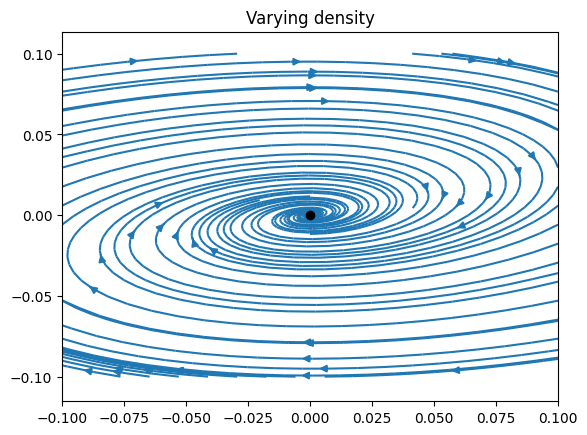

In [5]:
w_1 = -0.1
w_2 = 0.1
Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]

U, V = derivadas_1([X,Y], t)

plt.streamplot(X, Y, U, V, density=[0.6,0.6], broken_streamlines=False)
plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
#En este sistema el único punto de equilibrio es (0,0) porque el resto de la solución no tiene raíz
plt.title("Varying density")
plt.show()

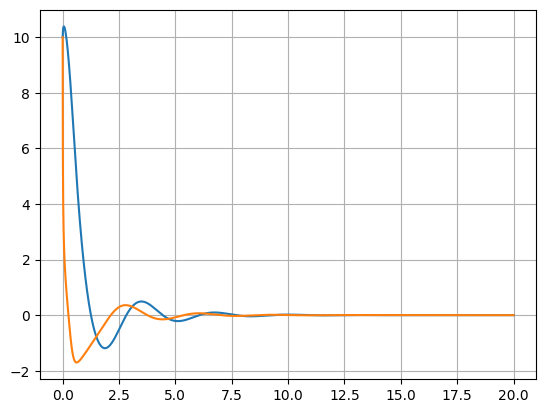

In [7]:
# Parámetros de la integración
Nt = 10000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [10, 10] #PUNTO DE EQUILIBRIO
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas_1, X0, t)
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.show()

OTRA ECUACIÓN NO LINEAL

In [9]:
# Definir las derivadas del sistema
alpha = 5
# Definir las derivadas del sistema
def derivadas(X, alpha):
    x, y = X
    dotx = -y + alpha*x*(x**2 + y**2)
    doty = x + alpha*x*(x**2 + y**2)
    return np.array([dotx, doty])

def diagrama_de_fase(alpha = 5):
  w_1 = -0.5
  w_2 = 0.5
  Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]

  U, V= derivadas([X,Y],alpha)

  plt.streamplot(X, Y, U, V, density=[0.6,0.6], broken_streamlines=False)
  plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
  plt.title("Varying density")
  plt.grid()
  plt.show()

p = interactive(diagrama_de_fase, alpha= (-10., 10.))
display(p)

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=-10.0), Output()), _dom_classe…

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


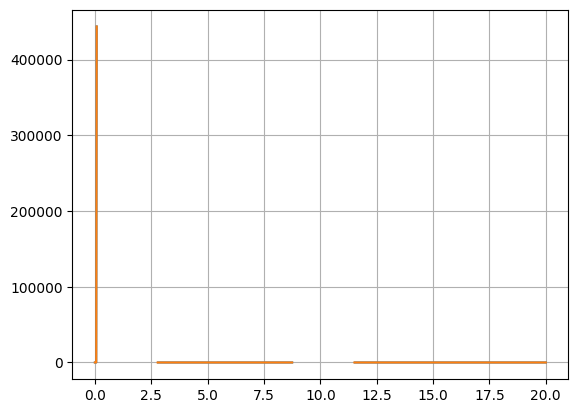

In [ ]:
# Parámetros de la integración
Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [10, 10] #PUNTO DE EQUILIBRIO
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas, X0, t)
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.show()

# PROBLEMA DE CICLO LÍMITE

Un ciclo límite es una trayectoria cerrada aislada (órbita periódica). Es un fenómeno que no se puede describir en un sistema lineal, es por eso que hay que observar los diagramas de fase para ver si hay uno o no. Se observan mucho en la naturaleza (control de sistemas térmicos en oscilaciones autosustentadas, electrocardiogramas, vibraciones aerolásticas en los aviones que son autosustentadas).

Es estable si todas las soluciones que comienzan en una vecindad cerrada, se acerca continuamente a la órbita periódica y copia a la trayectoria cerrada continuamente.

Es inestable si una pequeña perturbación el crecimiento de las oscilaciones se satura, todas las trayectorias cercanas son repelidas por la órbita periódica y se alejan continuamente. El ciclo límite actúan como un umbral de repulsión de las trayectorias del campo que no son el ciclo límite.


# Caso particular: oscilador de van del pol

Es un sistema dinámico que describe los circuitos electrónicos de las primeras radios.

x'' = -mu(x^2 - 1)x' - x
Es casi un oscilador armónico si no fuera por el término multiplicado por el mu que refiere a rozamiento o fricción.

mu(x^2-1) = coeficiente de amortiguamiento, mu > 0
Si el rozamiento es negativo: está acelerando las oscilaciones. Nos agrega energía.
Si el rozamiento es positivo: se va frenando el movimiento. Nos quita energía.

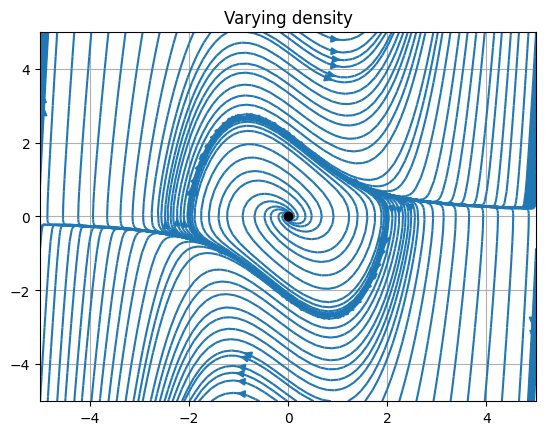

In [ ]:
# Definir las derivadas del sistema
mu = 1
# Definir las derivadas del sistema
def derivadas_ciclo_limite(X, mu):
    x, y = X
    dotx = y
    doty = -x + mu*(x**2 -1)*y
    return np.array([dotx, doty])

w_1 = -5
w_2 = 5
Y, X = np.mgrid[w_1:w_2:100j,w_1:w_2:100j]

U, V= derivadas_ciclo_limite([X,Y],mu)

plt.streamplot(X, Y, U, V, density=[1,1], broken_streamlines=False)
plt.plot([0],[0], marker = 'o', markersize=6, linestyle='', color='k')
plt.title("Varying density")
plt.grid()
plt.show()

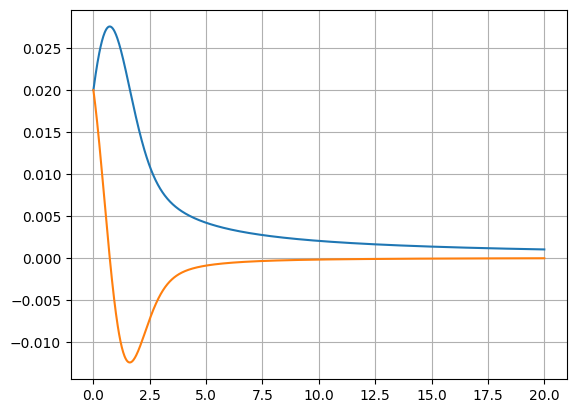

In [ ]:
# Parámetros de la integración
Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [0.02, 0.02] #Punto inicial
# Integración de las ecuaciones
res = integrate.odeint(derivadas_ciclo_limite, X0, t)
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.show()

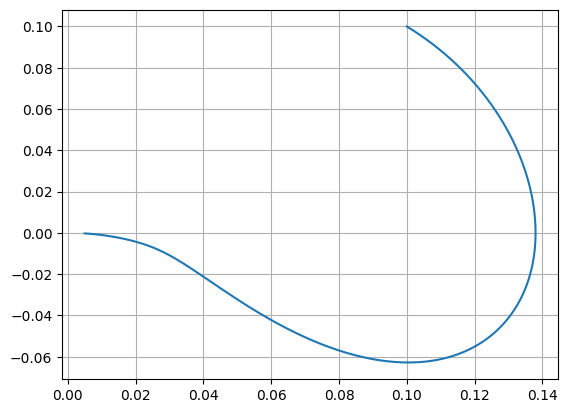

In [ ]:
plt.plot(x,y)
plt.grid()
plt.show()

EJERCICIO 19 A


```
# Esto tiene formato de código
```



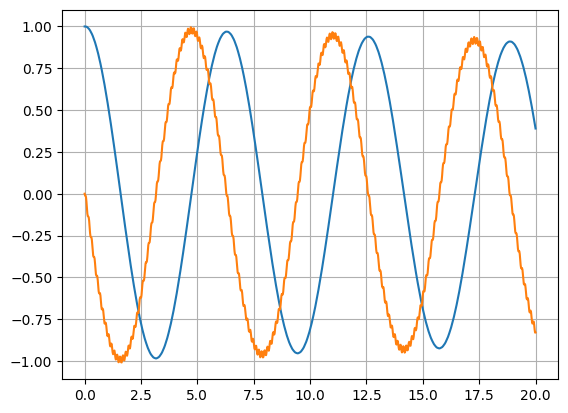

In [ ]:
m = 1
k = 1
b = 0.01
w = 50

def derivadas_19(X, t, m, k, b, w):
  x, y = X
  dotx = y
  doty = 1/m * (np.sin(w*t) - k*x - b*y)
  return np.array([dotx, doty])

Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [1, 0] #Condiciones iniciales
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas_19, X0, t,args= (m, k, b, w))
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.show()


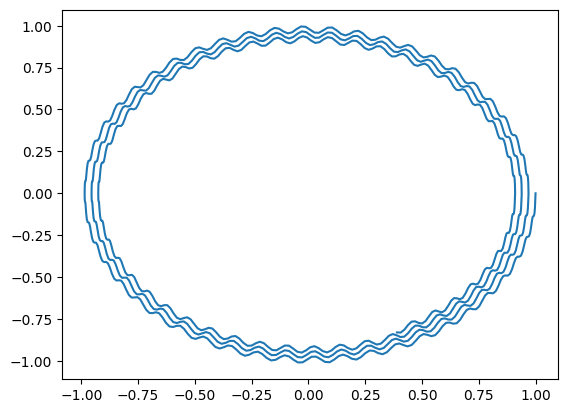

In [ ]:
plt.plot(x,y)
#Para frecuencias cercanas, la amplitud tiende a aumentar considerablemente; por lo tanto, también aumentan la posición y la velocidad

EJERCICIO 19 B


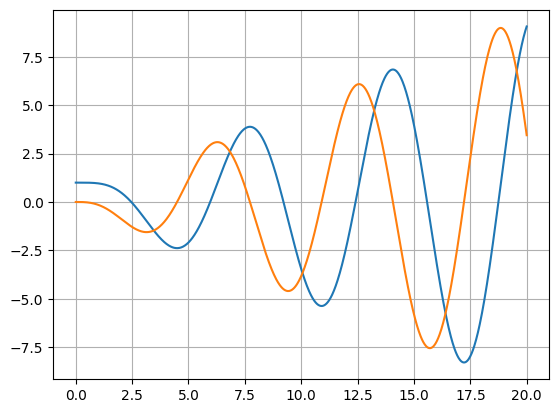

In [ ]:
m = 1
k = 1
b = 0.01
w = 50
lambdas = np.sqrt(4*m*k - b**2) * 1/2*m

def derivadas_19(X, t, m, k, b, w):
  x, y = X
  dotx = y
  doty = 1/m * (np.cos(lambdas*t) - k*x - b*y)
  return np.array([dotx, doty])

Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [1, 0] #Condiciones iniciales
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas_19, X0, t,args=(m, k, b, w))
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.show()

Resolver para f = 0 y b = 0, k = m = 1 para tiempo entre 0 y 1000. ¿Qu´e se observa?
¿Es correcto este comportamiento? Una propiedad importante de este caso es que, al no haber
rozamiento, se conserva la energ´ıa, siendo E = 1
2 kx2 + 1
2 m ˙x2. Para cada punto de la soluci´on,
calcular E y decidir si se mantiene constante.


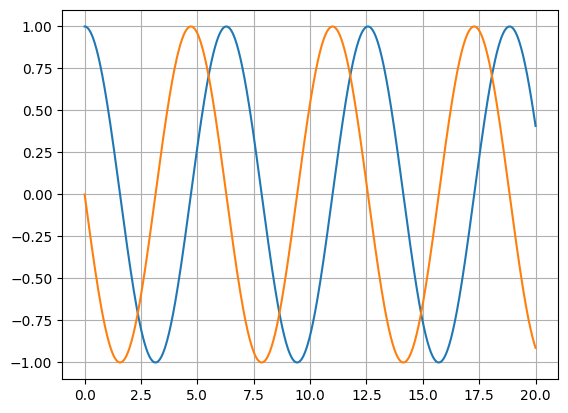

In [ ]:
m = 1
k = 1
b = 0

lambdas = np.sqrt(4*m*k - b**2) * 1/2*m

def derivadas_19(X, t, m, k, b):
  x, y = X
  dotx = y
  doty = 1/m * (- k*x - b*y)
  return np.array([dotx, doty])

Nt = 1000
tmax = 20
t = np.linspace(0, tmax, Nt)
X0 = [1, 0] #PUNTO DE EQUILIBRIO
#X0= [30,80] por ejemplo
# Integración de las ecuaciones
res = integrate.odeint(derivadas_19, X0, t,args=(m, k, b))
x, y = res.T  # Obtener las soluciones de x y y

# Graficar los resultados
plt.plot(t, x)
plt.plot(t, y)
plt.grid()
plt.show()

#NOS MUESTRA QUE LA ENERGÍA SE CONSERVA (PORQUE B ES EL ROZAMIENTO DEL SISTEMA Y SI NO HAY ROZAMIENTO ES UN SISTEMA QUE OSCILA EN EL VACÍO)